In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index supaya Date jadi kolom
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
import requests
from bs4 import BeautifulSoup

# Ambil data dari Wikipedia atau sumber lain
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

tesla_revenue = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

if tesla_revenue is not None:
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r'\$', '', regex=True).replace(',', '', regex=True)
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
    tesla_revenue.head()
else:
    print("Tabel Tesla Revenue tidak ditemukan.")


Tabel Tesla Revenue tidak ditemukan.


In [5]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [6]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

gme_revenue = None
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break

if gme_revenue is not None:
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r'\$', '', regex=True).replace(',', '', regex=True)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    gme_revenue.head()
else:
    print("Tabel GameStop Revenue tidak ditemukan.")


Tabel GameStop Revenue tidak ditemukan.


TypeError: 'NoneType' object is not subscriptable

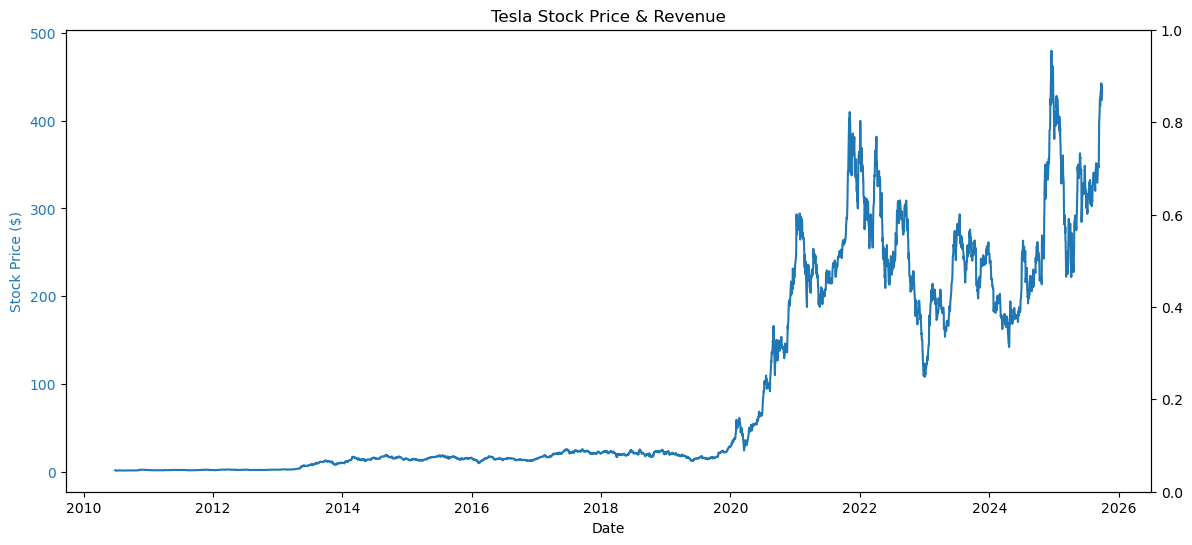

In [7]:
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(title)

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='tab:green')
    ax2.set_ylabel("Revenue ($ Millions)", color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.show()

make_graph(tesla_data, tesla_revenue, "TSLA", "Tesla Stock Price & Revenue")


TypeError: 'NoneType' object is not subscriptable

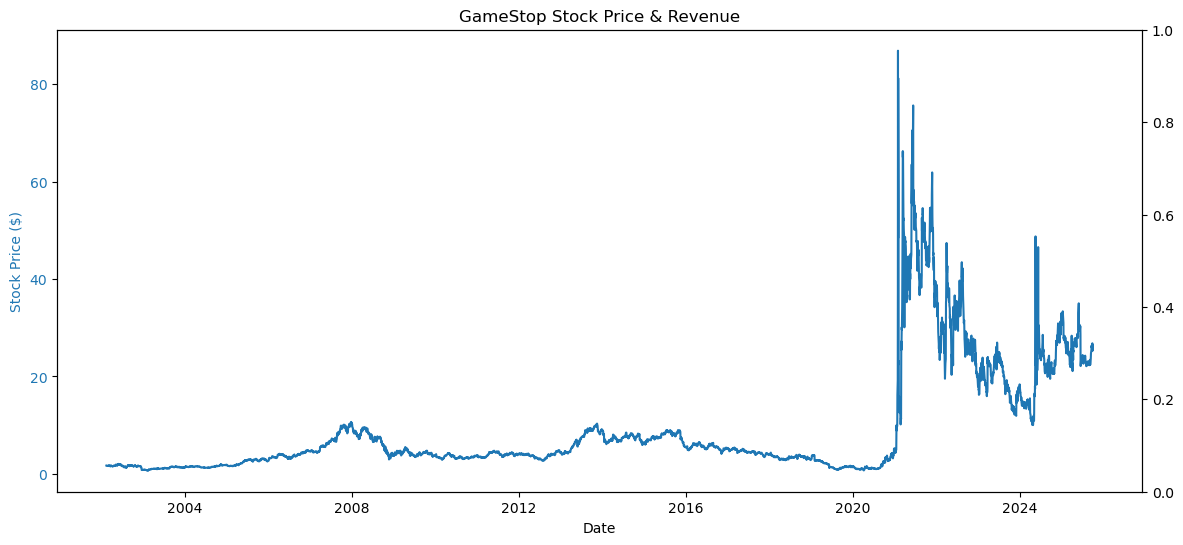

In [9]:
make_graph(gme_data, gme_revenue, "GME", "GameStop Stock Price & Revenue")